# Problem statement
For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:

* Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.
* Investigate the types of variables involved, their likely distributions, and their
relationships with each other.
* Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter notebook – the
data set itself can simply be displayed in an output cell within the notebook.

Note that this project is about simulation – you must synthesise a data set. Some
students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set. The next section
gives an example project idea.

## Layout:

* Introduce the dataset I'll be looking at.
* Introduce information on International Students in China. 
* Include algorithms for selecting student country, program type and scholarship with research to support.
* Introduce the HSK, and the difference between the levels.
* Algorithms and calculations for HSK written tests with research to support.
* Algorithms and calculations for HSK oral tests with research to support.
* Bringing it all together.
* Visualizations.

Initial thoughts - Only a fraction of International students in China get to the HSK 5 or 6.

Despite the large number of international students in China, the minority attempt a standardized test (HSK). Even then, the bulk of people that do these tests go for HSK 4 or HSK 5, with HSK 6 having a noticable drop off. This is likely due to HSK 5 being an entry requirement for most college degrees in China, and so anything below HSK 4 or 5 is seen as having little value, whereas the exponential difficulty gap between each level means that HSK 6 is a large commitment to aim towards. Of those that do attempt the HSK though, the pass rate is quite high - likely due to preparation classes available as extras in Chinese universities and schools.

I will also be highlighting the distribution of countries that students come from, with South Korea being the clear leader.


## Variables

* HSK level (see if I can get statistics on how many are awarded)
* Origin country
* Funding of study
* Level of program they enroll into
* Scores

## Country of Origin

Turns out I only have access to the top 15 countries from 2018

* South Korea	50,600
* Thailand	28,608
* Pakistan	28,023
* India	23,198
* United States	20,996
* Russia	19,239
* Indonesia	15,050
* Laos	14,645
* Japan	14,230
* Kazakhstan	11,784
* Vietnam	11,299
* Bangladesh	10,735
* France	10,695
* Mongolia	10,158
* Malaysia	9,479

https://www.researchcghe.org/perch/resources/publications/to-publish-wp46.pdf

Also has top 10 countries 2000-2016, and total international students. As I have HSK test data from 2012, if I follow these proportions I could estimate how many American students took on each of the tests. If I use the normal distribution of scores based on the earlier paper, I could simulate what students took on the HSK, what level and what score.

It also has the % of students enrolled in fulltime degrees, etc. I know most degrees require HSK 5 at least in order to enrol, so I could extrapolate this out to make an educated guess on the number % of students in Chinese Language undergraduate degrees, as undergraduate Chinese language degrees would not require a HSK to enroll.

It also shows how many students were receiving scholarships until 2013, and what proportion were for non-degree students. If I were to assume it grew at about the same rate as overall international students, and that it's shared proportionally between students from various countries, I could look at who was self-funded versus on scholarship.



In 2018 there were 492,185 International Students in China (http://global.chinadaily.com.cn/a/201904/12/WS5cb05c3ea3104842260b5eed.html#:~:text=Almost%20500%2C000%20international%20students%20studied,ministry%20said%20in%20a%20statement.)

So based off of that number and the above breakdown we know that 278739 came from those 15 countries, therefore 213446 would come from "Rest of the World". At present I do not have a way to break these down further. 




I've since found that there were 81,562 African students in China in 2018 (https://www.studyinternational.com/news/african-students-china-alienated/). There's no breakdown by country though. This would bring rest of the world down to 131884.

* Rest of the World 131,884
* Africa 81,562
* South Korea	50,600
* Thailand	28,608
* Pakistan	28,023
* India	23,198
* United States	20,996
* Russia	19,239
* Indonesia	15,050
* Laos	14,645
* Japan	14,230
* Kazakhstan	11,784
* Vietnam	11,299
* Bangladesh	10,735
* France	10,695
* Mongolia	10,158
* Malaysia	9,479

Going to work out proportions from each country

World Population Dataset from https://data.worldbank.org/indicator/SP.POP.TOTL

## Selecting African and Rest of the World countries.

I'm going to use data from the World Bank to find out what proportion of the African population each country of African has, and I'll use this as the probability of the student coming from that country. This isn't a perfect measure, as in the real world there'd be political and academic exchanges with particular countries, meanwhile some countries are more likely to have a population that can afford to go to China for self-funded study. Nonetheless, I prefer this route as I do not want the 54 countries of African treated as one unit.

I will also be doing the same for the Rest of the World. This comes with the same caveats as the African countries in that they do not represent academic or political exchanges. That said, the countries with large populations that are not counted in this top 15 or the African countries do tend to have populations that may afford studying abroad. For example Germany would be one of the remaining countries with a larger population, and so it's probability will be higher than others, however in real life its population is also likely to be more able to afford self-funded study in China.

In [1]:
#Can alter this to change the school size.
school_size = 2000

#Likewise the seed can be edited to get different results.
seed = 777

In [2]:
import pandas as pd
import numpy as np

#read_csv documentation https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.read_csv.html
#I've edited this dataset to remove aggregations (e.g. Eurozone, World).
#as well as China, Hong Kong and Macau - as these would not be considered International Students.
populations_df = pd.read_csv('world_populations.csv', usecols = ['Country Name', 'Country Code', '2018'])

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
populations_df.dropna(inplace=True)

populations_df['2018'] = populations_df['2018'].astype('int')


In [3]:
#Country Codes
african_country_codes = ['DZA','AGO','BWA','IOT','BDI','CMR','CPV','CAF','TCD',
                     'COM','MYT','COG','COD','BEN','GNQ','ETH','ERI','ATF',
                     'DJI','GAB','GMB','GHA','GIN','CIV','KEN','LSO','LBR',
                     'LBY','MDG','MWI','MLI','MRT','MUS','MAR','MOZ','NAM',
                     'NER','NGA','GNB','REU','RWA','SHN','STP','SEN','SYC',
                     'SLE','SOM','ZAF','ZWE','SSD','SDN','ESH','SWZ','TGO',
                     'TUN','UGA','EGY','TZA','BFA','ZMB']


#Slicing the dataframe to only include countries with the african_country_codes.
#I'll then dive the individual country's population in 2019 by the total for all the African countries to get the proportion.
populations_df.loc[populations_df['Country Code'].isin(african_country_codes), 'Proportion of African Population'] = populations_df['2018'] / populations_df.loc[populations_df['Country Code'].isin(african_country_codes)]['2018'].sum()

populations_df.loc[populations_df['Country Code'].isin(african_country_codes)].head()

#Turning the list of African countries and their probabilities into arrays to use later.
african_country = np.array(populations_df.loc[populations_df['Country Code'].isin(african_country_codes)]['Country Name'])
african_probabilities = np.array(populations_df.loc[populations_df['Country Code'].isin(african_country_codes)]['Proportion of African Population'])

In [4]:
#Need to remove the top 15 countries from rest of the world too.
#I'll first state what those top 15 country codes are.
top_15_country_codes = ['KOR', 'THA', 'PAK', 'IND', 'USA', 'RUS', 'IDN', 'LAO', 'JPN', 'KAZ', 'VNM', 'BGD', 'FRA', 'MNG', 'MYS']

In [5]:
#Top 15 countries combined population.
top_15_total_population = populations_df.loc[populations_df['Country Code'].isin(top_15_country_codes)]['2018'].sum()

#African countries combined population.
africa_total_population = populations_df.loc[populations_df['Country Code'].isin(african_country_codes)]['2018'].sum()

#World Population without China, Hong Kong & Macau, minus the African population, minus the top 15 countries
rest_of_world_population = 6267671127 - africa_total_population - top_15_total_population

#Removing the African countries and Top 15 countries from the rest_of_world slice.
rest_of_world = populations_df.loc[~populations_df['Country Code'].isin(african_country_codes)]
rest_of_world = rest_of_world.loc[~rest_of_world['Country Code'].isin(top_15_country_codes)]

#Working out the proportions for each country.
rest_of_world['Proportion of World Population'] = rest_of_world['2018'] / rest_of_world_population

#Turning the list of countries and their probabilities into arrays to use later.
rest_of_world_country = np.array(rest_of_world['Country Name'])
rest_of_world_probabilities = np.array(rest_of_world['Proportion of World Population'])
 
#At present, the probabilities for rest of the world do not equal 1. I will therefore fill the gap and assign it as "Other".
other = 1 - sum(rest_of_world_probabilities)

#Add "Other" into the selection and probabilties
rest_of_world_country = np.insert(rest_of_world_country, -1, 'Other')
rest_of_world_probabilities = np.insert(rest_of_world_probabilities, -1,  other)

Now that I have the probabilities and country names set up for the African and Rest of the World countries, I can use np.random.choice() to pick a student origin from the 17 regions (top 15 countries, Africa and Rest of the world). If Africa or Rest of the World is selected, it can then pick a country from those subsections.

Now I'll need to get the probabilities of each of the 17 regions to be selected.

In [6]:
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice

#State the list of possible countries to be selected by Choice()
student_origins = np.array(['Rest of the World', 'Africa', 'South Korea', 'Thailand', 'Pakistan', 'India', 'United States',
                  'Russia', 'Indonesia', 'Laos', 'Japan', 'Kazakhstan', 'Vietnam', 'Bangladesh', 'France', 'Mongolia',
                  'Malaysia'])

#Count of students from each region in 2018.
student_origin_counts = np.array([131884, 81562, 50600, 28608, 28023, 23198, 20996, 19239, 15050, 14645, 14230, 11784,
                        11299, 10735, 10695, 10158, 9479])


#Work out the probability that a student came from each region by its proportion to the total.
student_origin_probabilities = student_origin_counts / sum(student_origin_counts)


Now I'll use Choice() to select a country for each student. Choice() will select option (with replacement) from student_origins, the number of selections is decided by the value of school_size, and the probability of each option beng selected is determined by student_origin_probabilities.

In [7]:
rng = np.random.default_rng(seed)
students = rng.choice(student_origins, school_size, p=student_origin_probabilities)

students

array(['Pakistan', 'Africa', 'Pakistan', ..., 'Rest of the World',
       'United States', 'Rest of the World'], dtype='<U17')

In [8]:
rng = np.random.default_rng()

#Creating an index of student IDs to use for this
index = np.arange(0,school_size)

#Create the dataframe
chinese_class_df = pd.DataFrame(index = index, columns = ['Nationality'])
#Generate the countries
chinese_class_df['Nationality'] = rng.choice(student_origins, school_size, p=student_origin_probabilities)

#https://stackoverflow.com/questions/49471442/using-pandas-value-counts-to-get-one-value
#Iterating over rows
#African students have a country picked for them
chinese_class_df.loc[chinese_class_df['Nationality'] == 'Africa', 'Nationality'] = rng.choice(african_country, (chinese_class_df['Nationality'].values == 'Africa').sum(), p=african_probabilities) 

#Rest of the world students have a country picked for them
chinese_class_df.loc[chinese_class_df['Nationality'] == 'Rest of the World', 'Nationality'] = rng.choice(rest_of_world_country, (chinese_class_df['Nationality'].values == 'Rest of the World').sum(), p=rest_of_world_probabilities) 

chinese_class_df.value_counts()

Nationality      
South Korea          184
Thailand             120
Pakistan             109
India                105
United States         95
                    ... 
Kosovo                 1
Curacao                1
Denmark                1
Equatorial Guinea      1
Zimbabwe               1
Length: 135, dtype: int64

# Who sat the HSK tests?

Use 2012 figures for HSK test compared to International Students in China. Extrapolate what those numbers would be for 2018. Use the proportion that sat the tests as the success probability for a bernoulli distribution (via np.random.binomial).

Taken from Sina Weibo: 2009-2012 HSK takers - http://blog.sina.com.cn/s/blog_53e7c11d0101f02j.html
![here](https://screenshot.click/01_14-ryey4-tgwud.jpg)

Important to note that the current version of the HSK tests was introduced in 2010, so a sharp increase in the first few years isn't a surprise. (Wikipedia references the history - https://en.wikipedia.org/wiki/Hanyu_Shuiping_Kaoshi#Between_2010%E2%80%932020)

Also worthwhile noting that the table above doesn't specify students that took multiple HSK tests. For example someone could reasonably do HSK 1, 2 and 3 within the same year.

Looking at the numbers that sat the test within China (国内).

First let's look at the written HSK exams.
* HSK 一级
* HSK 二级
* HSK 三级
* HSK 四级
* HSK 五级
* HSK 六级

I'm going to calculate the annual total written HSK tests taken in each of these years, and compare to the number of international students in China for each year (from page 36 of https://www.researchcghe.org/perch/resources/publications/to-publish-wp46.pdf).

In [9]:
hsk_written_2010 = 146 + 210 + 1171 + 3842 + 6931 + 5566
hsk_written_2011 = 274 + 755 + 2504 + 11635 + 18018 + 12975
hsk_written_2012 = 658 + 1343 + 4003 + 16158 + 21278 + 17153

print("Total students taking HSK written exam in 2010: " + str(hsk_written_2010))
print("Total students taking HSK written exam in 2011: " + str(hsk_written_2011))
print("Total students taking HSK written exam in 2012: " + str(hsk_written_2012))

total_international_students_2010 = 265090
total_international_students_2011 = 292611
total_international_students_2012 = 328330

print("Proportion of international students taking HSK written exam in 2010: " + str(hsk_written_2010 / total_international_students_2010))
print("Proportion of international students taking HSK written exam in 2011: " + str(hsk_written_2011 / total_international_students_2011))
print("Proportion of international students taking HSK written exam in 2012: " + str(hsk_written_2012 / total_international_students_2012))

Total students taking HSK written exam in 2010: 17866
Total students taking HSK written exam in 2011: 46161
Total students taking HSK written exam in 2012: 60593
Proportion of international students taking HSK written exam in 2010: 0.06739597872420687
Proportion of international students taking HSK written exam in 2011: 0.15775551841865137
Proportion of international students taking HSK written exam in 2012: 0.18454908171656564


As 2012 is the latest year I can find for these types of figures, I will extrapolate the 2012 proportion to the number of international students in 2018. 

There were 492,185 international students in 2018, and if 18.5% took a HSK test we can expect:

In [10]:
hsk_written_total_2018 = 492185 * 0.185
print("Estimated total students taking HSK written exam in 2018: " + str(round(hsk_written_total_2018,0)))

Estimated total students taking HSK written exam in 2018: 91054.0


Now to see how many of my students sat a written HSK exam in 2018.

In [11]:
rng = np.random.default_rng()

#https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial
chinese_class_df['HSK written test?'] = rng.binomial(1, 0.185, school_size)

chinese_class_df['HSK written test?'].value_counts()

0    1626
1     374
Name: HSK written test?, dtype: int64

And now the oral exams
* HSK 初级
* HSK 中级
* HSK 高级

In [12]:
hsk_oral_2010 = 51 + 300 + 672
hsk_oral_2011 = 67 + 506 + 1313
hsk_oral_2012 = 56 + 1708 + 1407

print("Total students taking HSK oral exam in 2010: " + str(hsk_oral_2010))
print("Total students taking HSK oral exam in 2011: " + str(hsk_oral_2011))
print("Total students taking HSK oral exam in 2012: " + str(hsk_oral_2012))

total_international_students_2010 = 265090
total_international_students_2011 = 292611
total_international_students_2012 = 328330

print("Proportion of international students taking HSK oral exam in 2010: " + str(hsk_oral_2010 / total_international_students_2010))
print("Proportion of international students taking HSK oral exam in 2011: " + str(hsk_oral_2011 / total_international_students_2011))
print("Proportion of international students taking HSK oral exam in 2012: " + str(hsk_oral_2012 / total_international_students_2012))

Total students taking HSK oral exam in 2010: 1023
Total students taking HSK oral exam in 2011: 1886
Total students taking HSK oral exam in 2012: 3171
Proportion of international students taking HSK oral exam in 2010: 0.0038590667320532648
Proportion of international students taking HSK oral exam in 2011: 0.00644541729463349
Proportion of international students taking HSK oral exam in 2012: 0.00965796607072153


Again, I'll use the 2012 figure, and round it up to 1%

In [13]:
hsk_oral_total_2018 = 492185 * 0.01
print("Estimated total students taking HSK oral exam in 2018: " + str(round(hsk_oral_total_2018,0)))

Estimated total students taking HSK oral exam in 2018: 4922.0


Now to see how many of my students sat the HSK oral exam in 2018

In [14]:
rng = np.random.default_rng()

#https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial
chinese_class_df['HSK oral test?'] = rng.binomial(1, 0.01, school_size)

chinese_class_df['HSK oral test?'].value_counts()

0    1993
1       7
Name: HSK oral test?, dtype: int64

Did any students sit both the written and oral exams?

In [15]:
chinese_class_df.loc[(chinese_class_df['HSK written test?'] == 1) & (chinese_class_df['HSK oral test?'] == 1)]

,Nationality,HSK written test?,HSK oral test?


### Who sat which exam?

Look at the proportion of folks that did Hsk 1-6, and HSK beginner-advanced to use as probabilities. If a student has 1 in the oral or written test columns, np.random.choice based on the probabilities. As I'll be extrapolating 2012 figures for 2018, I'll use the 2012 ratios here too.

In [16]:
#Using the 2012 figures to work out what proportion of HSK takers sat each level that year.

#Listing the 6 HSK levels for the written exam
hsk_written_levels = np.array(['HSK1', 'HSK2', 'HSK3', 'HSK4', 'HSK5', 'HSK6'])

#Dividing the 2012 figures for each level by total HSK tests taken that year. These proportions will be my probabilities
hsk_written_levels_proportions = np.array([658, 1343, 4003, 16158, 21278, 17153]) / hsk_written_2012

hsk_written_levels_proportions

array([0.01085934, 0.02216428, 0.06606374, 0.26666447, 0.35116268,
       0.2830855 ])

We can use these proportions to estimate how many of our estimated 91054 HSK written exam takers took each level in 2018.

In [17]:
print("Estimated HSK 1 takers in 2018: " + str(round(hsk_written_levels_proportions[0] * 91054, 0)))
print("Estimated HSK 2 takers in 2018: " + str(round(hsk_written_levels_proportions[1] * 91054, 0)))
print("Estimated HSK 3 takers in 2018: " + str(round(hsk_written_levels_proportions[2] * 91054, 0)))
print("Estimated HSK 4 takers in 2018: " + str(round(hsk_written_levels_proportions[3] * 91054, 0)))
print("Estimated HSK 5 takers in 2018: " + str(round(hsk_written_levels_proportions[4] * 91054, 0)))
print("Estimated HSK 6 takers in 2018: " + str(round(hsk_written_levels_proportions[5] * 91054, 0)))


Estimated HSK 1 takers in 2018: 989.0
Estimated HSK 2 takers in 2018: 2018.0
Estimated HSK 3 takers in 2018: 6015.0
Estimated HSK 4 takers in 2018: 24281.0
Estimated HSK 5 takers in 2018: 31975.0
Estimated HSK 6 takers in 2018: 25776.0


Now to use these proportions as my probabilities to estimate what level each of my school's HSK takers attempted.

In [18]:
#Only want students that have "HSK written test?" set as 1. First count how many there are to use as the size for rng.choice()

chinese_class_df.loc[chinese_class_df['HSK written test?'] == 1, 'HSK Level'] = rng.choice(hsk_written_levels, chinese_class_df['HSK written test?'].sum(), p=hsk_written_levels_proportions) 

chinese_class_df['HSK Level'].value_counts()

HSK5    135
HSK6    105
HSK4     98
HSK3     27
HSK2      7
HSK1      2
Name: HSK Level, dtype: int64

Now to do the same for the oral test.

In [19]:
hsk_oral_levels = np.array(['Beginner', 'Intermediate', 'Advanced'])
hsk_oral_level_proportions = np.array([56, 1708, 1407]) / hsk_oral_2012

hsk_oral_level_proportions

array([0.01766004, 0.53863135, 0.44370861])

Once again, let's extrapolate this our for 2018. Early I estimated 4922 people sat a HSK oral test.

In [20]:
print("Estimated HSK Beginner takers in 2018: " + str(round(hsk_oral_level_proportions[0] * 4922, 0)))
print("Estimated HSK Intermediate takers in 2018: " + str(round(hsk_oral_level_proportions[1] * 4922, 0)))
print("Estimated HSK Advanced takers in 2018: " + str(round(hsk_oral_level_proportions[2] * 4922, 0)))

Estimated HSK Beginner takers in 2018: 87.0
Estimated HSK Intermediate takers in 2018: 2651.0
Estimated HSK Advanced takers in 2018: 2184.0


Now to see which oral tests the students in my school took.

In [21]:
#Only want students that have "HSK oral test?" set as 1. First count how many there are to use as the size for rng.choice()

chinese_class_df.loc[chinese_class_df['HSK oral test?'] == 1, 'HSK Oral Level'] = rng.choice(hsk_oral_levels, chinese_class_df['HSK oral test?'].sum(), p=hsk_oral_level_proportions) 

chinese_class_df['HSK Oral Level'].value_counts()

Intermediate    4
Advanced        3
Name: HSK Oral Level, dtype: int64

# HSK Results

For those students that sat the HSK tests, we can now simulate what their scores might be. Finding data on HSK scores and results has proven to be very difficult (both in Chinese and in English), however according there has been a study on 108 American students and their HSK results before and after a semester of study in Beijing (https://www.researchgate.net/figure/Descriptive-statistics-of-general-proficiency-measured-by-HSK_tbl1_312107625). It should be noted that this paper covers just 108 students from the same country, so in reality there's likely to be numerous other variables that may impact the results seen by a particular student or even a whole cohort of students. For example, Chinese textbooks will have grammar and other explanations written in English for HSK 1 through to HSK 3, and the quality of those translations, or how comparable the grammar rules are to the readers native language may influence how well they retain the information and therefore perform on the test. 

Similarly, all 108 students in this study took the HSK 4 written test and the intermediate oral test, so we do not have comparable results for the various other levels. That said, all of the tests follow a similar marking structure, with each section scored out of 100, and so for the purposes of this assignment I will be utilising the mean and standard deviation that was found among those 108 students.

This is by no means a perfect simulation of the scores that I can expect at my fictional school, but with the absence of data on HSK test scores or pass/fail rates, it will have to suffice.

## HSK Written Test Results

https://www.chinaeducenter.com/en/exams.php

The HSK written tests follow a similar structure, with each level becoming more difficult. Levels 1 and 2 do not include a writing section, as students at this level are not expected to be able to hand write a large number of characters, and so reading and listening skills are the only areas tested. For levels 3 through to 6; reading, writing and listening are each tested.

For levels 1-5, the student must achieve at least 60% in order to pass the test. For HSK level 6, only a score of 40% is required. The HSK tests are a simple pass/fail grading system.

As each of the tests includes a reading and listening portion scored out of 100, and as I will be using the mean and standard deviation from the above linked study to simulate the results regardless of level, I can use the same function for all the written HSK takers. For this I will use a normal distribution.

In [22]:
#Reading results https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal

reading_mean = 75.39
reading_sd = 13.85
chinese_class_df.loc[chinese_class_df['HSK written test?'] == 1, 'Reading'] = rng.normal(reading_mean, reading_sd, chinese_class_df['HSK written test?'].sum())

#Reducing the HSK6 results by 1/3 to reflect the higher difficulty. The mean and SD for HSK4 is too high for this test.

chinese_class_df.loc[chinese_class_df['HSK Level'] == 'HSK6', ['Reading']] = (chinese_class_df['Reading'] / 3) * 2

#Normal distribution will pick a few values above 100. This goes beyond the possible score in the section, so I'll cap these at 100.
chinese_class_df.loc[chinese_class_df['Reading'] > 100, 'Reading'] = 100


#Listening test
listening_mean = 70.73
listening_sd = 15.22

chinese_class_df.loc[chinese_class_df['HSK written test?'] == 1, 'Listening'] = rng.normal(listening_mean, listening_sd, chinese_class_df['HSK written test?'].sum())
chinese_class_df.loc[chinese_class_df['HSK Level'] == 'HSK6', ['Listening']] = (chinese_class_df['Listening'] / 3) * 2
chinese_class_df.loc[chinese_class_df['Listening'] > 100, 'Listening'] = 100


#Only HSK 3 - 6 has a writing section, so I'll make a mask to help me subset those tests.
hsk_writing_sections = ['HSK3', 'HSK4', 'HSK5', 'HSK6']

writing_mean = 69.67
writing_sd = 11.95

chinese_class_df.loc[chinese_class_df['HSK Level'].isin(hsk_writing_sections), 'Writing'] = rng.normal(writing_mean, writing_sd, len(chinese_class_df.loc[chinese_class_df['HSK Level'].isin(hsk_writing_sections)]))
chinese_class_df.loc[chinese_class_df['HSK Level'] == 'HSK6', ['Writing']] = (chinese_class_df['Writing'] / 3) * 2
chinese_class_df.loc[chinese_class_df['Writing'] > 100, 'Writing'] = 100

#https://stackoverflow.com/questions/31247763/round-columns-in-pandas-dataframe

chinese_class_df[['Reading', 'Listening', 'Writing']] = chinese_class_df[['Reading', 'Listening', 'Writing']].apply(pd.Series.round)

#Combined the 3 sections to get the score
chinese_class_df['Total Written Score'] = chinese_class_df['Reading'] + chinese_class_df['Listening'] + chinese_class_df['Writing']

#HSK 3 - 6 has 3 sections, so final score has to be divided by 3.
chinese_class_df.loc[chinese_class_df['HSK Level'].isin(hsk_writing_sections), 'Total Written Score'] = round(chinese_class_df['Total Written Score'] / 3, 2)

chinese_class_df.loc[~chinese_class_df['HSK Level'].isin(hsk_writing_sections), 'Total Written Score'] = round(chinese_class_df['Total Written Score'] / 2, 2)

hsk_pass_60_tests = ['HSK1','HSK2','HSK3','HSK4','HSK5']

chinese_class_df.loc[(chinese_class_df['HSK Level'].isin(hsk_pass_60_tests)) & (chinese_class_df['Total Written Score'] >= 60), 'HSK Pass'] = 1
chinese_class_df.loc[(chinese_class_df['HSK Level'].isin(hsk_pass_60_tests)) & (chinese_class_df['Total Written Score'] < 60), 'HSK Pass'] = 0
chinese_class_df.loc[(~chinese_class_df['HSK Level'].isin(hsk_pass_60_tests)) & (chinese_class_df['Total Written Score'] >=40), 'HSK Pass'] = 1
chinese_class_df.loc[(~chinese_class_df['HSK Level'].isin(hsk_pass_60_tests)) & (chinese_class_df['Total Written Score'] <40), 'HSK Pass'] = 0

chinese_class_df['HSK Pass'].value_counts()

1.0    343
0.0     22
Name: HSK Pass, dtype: int64

## HSK Oral Test Results

Unlike the written tests which have 2 or 3 distinct sections, the HSK Oral Test just tests spoken language skills, and so just has the 1 speaking section. The passing grade for this is 60% for all three levels of the oral test (beginner, intermiedate, advanced).

The previous mentioned study for 108 students from the US also measured the results of the HSK Oral test for those students. One notable difference here is that due to the low participation rate of the HSK Oral test, a sample of 108 measurements is actually fairly sizable. Earlier in my extrapolation of 2012 trends to 2018 international student figures, we saw that only about 1% of students in China attempt the HSK Oral test. While the written HSK 4 is seen as the first valuable HSK certification, and HSK 5 is required for attending a college program in Chinese, the oral certifications have very few applications. 

In [23]:
hsk_oral_mean = 79
hsk_oral_sd = 9.84

chinese_class_df.loc[chinese_class_df['HSK oral test?'] == 1, 'Speaking'] = rng.normal(hsk_oral_mean, hsk_oral_sd, chinese_class_df['HSK oral test?'].sum())
chinese_class_df.loc[chinese_class_df['Speaking'] > 100, 'Speaking'] = 100

chinese_class_df[['Speaking']] = chinese_class_df[['Speaking']].apply(pd.Series.round)


chinese_class_df.loc[chinese_class_df['Speaking'] >= 60, 'HSK Oral Pass'] = 1
chinese_class_df.loc[chinese_class_df['Speaking'] < 60, 'HSK Oral Pass'] = 0


chinese_class_df.describe()

,HSK written test?,HSK oral test?,Reading,Listening,Writing,Total Written Score,HSK Pass,Speaking,HSK Oral Pass
count,2000.000000,2000.000000,374.000000,374.000000,365.000000,365.000000,365.000000,7.000000,7.0
mean,0.187000,0.003500,68.799465,64.735294,63.410959,65.458575,0.939726,76.142857,1.0
std,0.390009,0.059072,16.748571,16.862859,15.594656,13.125633,0.238320,8.989412,0.0
min,0.000000,0.000000,28.000000,22.000000,25.000000,34.330000,0.000000,62.000000,1.0
25%,0.000000,0.000000,56.000000,52.000000,51.000000,53.670000,1.000000,70.500000,1.0
50%,0.000000,0.000000,69.000000,65.000000,64.000000,68.330000,1.000000,80.000000,1.0
75%,0.000000,0.000000,81.750000,77.000000,75.000000,75.330000,1.000000,82.000000,1.0
max,1.000000,1.000000,100.000000,100.000000,100.000000,92.000000,1.000000,86.000000,1.0


HSK6 scores are too high. The mean for the HSK results is around 60, whereas pass for HSK6 is only 40. I will reduce the values by 1/3 to account for this.

Also the scores need to be rounded. The normal distribution is a continuous one, so this isn't a surprise, especially as the standard deviation values are floats.

## HSK results

https://www.researchgate.net/figure/Descriptive-statistics-of-general-proficiency-measured-by-HSK_tbl1_312107625

108 participants from the US did the intermedite spoken exam and HSK 4 written exam.

These students stayed in the country for 1 semester (about 3 months).

We also have the mean, min, max and std from that group.

![here](https://screenshot.click/28_19-215cg-skgcm.jpg)

I could use this to create a normal distribution of test scores from US students who have been studying in China. As I know what a passing score is, I could calculate if it was a pass or fail.

Another source of data on HSK 4 results http://dpi-proceedings.com/index.php/dtem/article/view/30976/29557

Shows the mean and std for 30 students from Beijing Language & Culture University

![here](https://screenshot.click/28_02-0i7p9-b37me.jpg)



Some more results for 2010 including pass rates and average scores for each HSK level http://www.chinesetest.cn/gonewcontent.do?id=5589387 (Note - these are for tests taken outside China)

## Funding

We know from http://en.moe.gov.cn/news/press_releases/201904/t20190418_378586.html that 63,041 received student scholarships from the Chinese government. This is 12.81% of the total International Students that year. For this we can use a bernoulli distribution (via the np.random.binomial function) to show who has a scholarship and who is self-funded.

In [24]:
#Will use 1 to indicate a scholarship, and use the 12.81% figure from the government statistics.
chinese_class_df['Scholarship'] = rng.binomial(1, 0.1281, school_size)
chinese_class_df['Scholarship'].value_counts()

0    1761
1     239
Name: Scholarship, dtype: int64

In [25]:
chinese_class_df.head()

,Nationality,HSK written test?,HSK oral test?,HSK Level,HSK Oral Level,Reading,Listening,Writing,Total Written Score,HSK Pass,Speaking,HSK Oral Pass,Scholarship
0,Nepal,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Kazakhstan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Angola,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Vietnam,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Kazakhstan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## Types of program

According to http://en.moe.gov.cn/news/press_releases/201904/t20190418_378586.html 234,063 International students were not enrolled in degree programs. Of the 258,122 that were,  59,444 were in master's degrees and 25,618 were doctoral. THis means that 173,060 must have been undergraduate degrees. 

Unfortunately we do not have a breakdown on what areas these degrees would have been in. We know already that degrees taught in Chinese would require someone to already have HSK level 5 in order to join the course, however this requirement is not in place for students looking to study Chinese language. 

As my example is for a Chinese language school, I will therefore us these proportions as is. Postgraduate students could be coming to the school to learn Chinese alongside their existing languages or skills.

In [26]:
#Declare the 4 types of programs available at the school.
program_type = ['Non-degree', 'Undergraduate', "Master's", 'Doctoral']

program_totals = np.array([234063, 173060, 59444, 25618])

program_probabilities = program_totals / sum(program_totals)

chinese_class_df['Program'] = rng.choice(program_type, school_size, p=program_probabilities)


In [27]:
chinese_class_df.head()

,Nationality,HSK written test?,HSK oral test?,HSK Level,HSK Oral Level,Reading,Listening,Writing,Total Written Score,HSK Pass,Speaking,HSK Oral Pass,Scholarship,Program
0,Nepal,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Master's
1,Kazakhstan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Undergraduate
2,Angola,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Doctoral
3,Vietnam,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Non-degree
4,Kazakhstan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Non-degree


# Generating the dataset in full

## 1. Setting up student nationalities

In [28]:
import pandas as pd
import numpy as np

#This can be altered to change the school size.
school_size = 500

#Using an edited dataset from the world bank. I've removed regional aggregations (e.g. Eurozone, World).
#as well as China, Hong Kong and Macau - as these would not be considered International Students.
#I will be using the 2018 population data, and will drop any countries that don't have an entry.
populations_df = pd.read_csv('world_populations.csv', usecols = ['Country Name', 'Country Code', '2018'])
populations_df.dropna(inplace=True)
#2018 column is stored as strings, so changing to integers for later calculations.
populations_df['2018'] = populations_df['2018'].astype('int')

#Stating the African country codes for a slice of the dataframe.
african_country_codes = ['DZA','AGO','BWA','IOT','BDI','CMR','CPV','CAF','TCD',
                     'COM','MYT','COG','COD','BEN','GNQ','ETH','ERI','ATF',
                     'DJI','GAB','GMB','GHA','GIN','CIV','KEN','LSO','LBR',
                     'LBY','MDG','MWI','MLI','MRT','MUS','MAR','MOZ','NAM',
                     'NER','NGA','GNB','REU','RWA','SHN','STP','SEN','SYC',
                     'SLE','SOM','ZAF','ZWE','SSD','SDN','ESH','SWZ','TGO',
                     'TUN','UGA','EGY','TZA','BFA','ZMB']
#Stating the country codes of the top 15 sources of students for a slice on the dataframe.
top_15_country_codes = ['KOR', 'THA', 'PAK', 'IND', 'USA', 'RUS', 'IDN', 'LAO', 
                        'JPN', 'KAZ', 'VNM', 'BGD', 'FRA', 'MNG', 'MYS']


#Slicing the dataframe to only include countries with the african_country_codes.
#Dividing the individual country's population in 2018 by the total for all the African countries to get the proportion to be used as probability later.
populations_df.loc[populations_df['Country Code'].isin(african_country_codes), 'Proportion of African Population'] = populations_df['2018'] / populations_df.loc[populations_df['Country Code'].isin(african_country_codes)]['2018'].sum()

#Removing the known African and Top 15 countries combined populations from Rest of the World.
#Top 15 countries combined population.
top_15_total_population = populations_df.loc[populations_df['Country Code'].isin(top_15_country_codes)]['2018'].sum()
#African countries combined population.
africa_total_population = populations_df.loc[populations_df['Country Code'].isin(african_country_codes)]['2018'].sum()
#World Population without China, Hong Kong & Macau, minus the African population, minus the top 15 countries
rest_of_world_population = 6267671127 - africa_total_population - top_15_total_population

#Removing the African countries and Top 15 countries from the rest_of_world slice.
rest_of_world = populations_df.loc[~populations_df['Country Code'].isin(african_country_codes)]
rest_of_world = rest_of_world.loc[~rest_of_world['Country Code'].isin(top_15_country_codes)]

#Working out the proportions for each country in the Rest of the World.
rest_of_world['Proportion of World Population'] = rest_of_world['2018'] / rest_of_world_population

#Turning the list of African countries and their probabilities into arrays to use later.
african_country = np.array(populations_df.loc[populations_df['Country Code'].isin(african_country_codes)]['Country Name'])
african_probabilities = np.array(populations_df.loc[populations_df['Country Code'].isin(african_country_codes)]['Proportion of African Population'])
#Turning the list of countries and their probabilities into arrays to use later.
rest_of_world_country = np.array(rest_of_world['Country Name'])
rest_of_world_probabilities = np.array(rest_of_world['Proportion of World Population'])
 
#At present, the probabilities for rest of the world do not equal 1. I will therefore fill the gap and assign it as "Other".
other = 1 - sum(rest_of_world_probabilities)
#Add "Other" into the selection and probabilties
rest_of_world_country = np.insert(rest_of_world_country, -1, 'Other')
rest_of_world_probabilities = np.insert(rest_of_world_probabilities, -1,  other)


#State the list of possible countries or regions to be selected by Choice()
student_origins = np.array(['Rest of the World', 'Africa', 'South Korea', 'Thailand', 'Pakistan', 'India', 'United States',
                  'Russia', 'Indonesia', 'Laos', 'Japan', 'Kazakhstan', 'Vietnam', 'Bangladesh', 'France', 'Mongolia',
                  'Malaysia'])
#Count of International Students students from each region in 2018.
student_origin_counts = np.array([131884, 81562, 50600, 28608, 28023, 23198, 20996, 19239, 15050, 14645, 14230, 11784,
                        11299, 10735, 10695, 10158, 9479])
#Work out the probability that a student came from each region by its proportion to the total.
student_origin_probabilities = student_origin_counts / sum(student_origin_counts)


## 2. Generating the dataset

In [29]:
#Creating the pseudorandom number generator container.
rng = np.random.default_rng()

#Creating an index of student IDs to use for the dataframe.
index = np.arange(0, school_size)

#Creating the dataframe
chinese_class_df = pd.DataFrame(index = index, columns = ['Nationality'])

#Simulating the first pick of countries and regions.
chinese_class_df['Nationality'] = rng.choice(student_origins, school_size, p=student_origin_probabilities)

#Students from "Africa" or "Rest of the World" need a specific country selected.
#African students have a country picked for them
chinese_class_df.loc[chinese_class_df['Nationality'] == 'Africa', 'Nationality'] = rng.choice(african_country, (chinese_class_df['Nationality'].values == 'Africa').sum(), p=african_probabilities) 
#Rest of the world students have a country picked for them
chinese_class_df.loc[chinese_class_df['Nationality'] == 'Rest of the World', 'Nationality'] = rng.choice(rest_of_world_country, (chinese_class_df['Nationality'].values == 'Rest of the World').sum(), p=rest_of_world_probabilities) 



#Using 1 to indicate a scholarship, with a probability of 12.81% from the government statistics for 2018.
chinese_class_df['Scholarship'] = rng.binomial(1, 0.1281, school_size)

#Declaring the 4 types of programs available at the school.
program_type = ['Non-degree', 'Undergraduate', "Master's", 'Doctoral']
#The total number of International students on each program type in China in 2018.
program_totals = np.array([234063, 173060, 59444, 25618])
#Using those totals and their proportion of the whole to create probabilities.
program_probabilities = program_totals / sum(program_totals)
#Generating program types for each student.
chinese_class_df['Program'] = rng.choice(program_type, school_size, p=program_probabilities)


#Simulating the students that sat any HSK written exam, based off the percentage calculated in the HSK section of this notebook.
chinese_class_df['HSK written test?'] = rng.binomial(1, 0.185, school_size)

#Simulating which written test these students took.
#Listing the 6 HSK levels for the written exam
hsk_written_levels = np.array(['HSK1', 'HSK2', 'HSK3', 'HSK4', 'HSK5', 'HSK6'])
#The total number of students that took these tests in 2012.
hsk_written_2012 = np.array([658, 1343, 4003, 16158, 21278, 17153])
#Dividing the 2012 figures for each level by total HSK tests taken that year. These proportions will be my probabilities
hsk_written_levels_proportions = hsk_written_2012 / sum(hsk_written_2012)

#Using Choice() to select a HSK level for each of the students that sat a HSK written test.
chinese_class_df.loc[chinese_class_df['HSK written test?'] == 1, 'HSK Level'] = rng.choice(hsk_written_levels, chinese_class_df['HSK written test?'].sum(), p=hsk_written_levels_proportions) 

#Simulating the results for each section of the written test. 
#Simulation based off the mean and standard deviation from the study of 108 US students.
#Reading section. First stating the mean and standard deviation.
reading_mean = 75.39
reading_sd = 13.85
#Generating the results.
chinese_class_df.loc[chinese_class_df['HSK written test?'] == 1, 'Reading'] = rng.normal(reading_mean, reading_sd, chinese_class_df['HSK written test?'].sum())
#Reducing the HSK6 results by 1/3 to reflect the higher difficulty. The mean and SD for HSK4 is too high for this test.
chinese_class_df.loc[chinese_class_df['HSK Level'] == 'HSK6', ['Reading']] = (chinese_class_df['Reading'] / 3) * 2
#Normal distribution will pick a few values above 100. This goes beyond the possible score in the section, so I'll cap these at 100.
chinese_class_df.loc[chinese_class_df['Reading'] > 100, 'Reading'] = 100


#Listening section - same process as for the Reading test.
listening_mean = 70.73
listening_sd = 15.22
chinese_class_df.loc[chinese_class_df['HSK written test?'] == 1, 'Listening'] = rng.normal(listening_mean, listening_sd, chinese_class_df['HSK written test?'].sum())
chinese_class_df.loc[chinese_class_df['HSK Level'] == 'HSK6', ['Listening']] = (chinese_class_df['Listening'] / 3) * 2
chinese_class_df.loc[chinese_class_df['Listening'] > 100, 'Listening'] = 100

#Writing section.
#Only HSK 3 - 6 has a writing section. Creating a mask to subset those tests.
hsk_writing_sections = ['HSK3', 'HSK4', 'HSK5', 'HSK6']

writing_mean = 69.67
writing_sd = 11.95
chinese_class_df.loc[chinese_class_df['HSK Level'].isin(hsk_writing_sections), 'Writing'] = rng.normal(writing_mean, writing_sd, len(chinese_class_df.loc[chinese_class_df['HSK Level'].isin(hsk_writing_sections)]))
chinese_class_df.loc[chinese_class_df['HSK Level'] == 'HSK6', ['Writing']] = (chinese_class_df['Writing'] / 3) * 2
chinese_class_df.loc[chinese_class_df['Writing'] > 100, 'Writing'] = 100

#Scores for each section must be rounded to integers.
chinese_class_df[['Reading', 'Listening', 'Writing']] = chinese_class_df[['Reading', 'Listening', 'Writing']].apply(pd.Series.round)

#HSK Written Results
#Sum the 3 sections to get the score.
chinese_class_df['Total Written Score'] = chinese_class_df['Reading'] + chinese_class_df['Listening'] + chinese_class_df['Writing']

#HSK 3 - 6 has 3 sections, so final score has to be divided by 3.
chinese_class_df.loc[chinese_class_df['HSK Level'].isin(hsk_writing_sections), 'Total Written Score'] = round(chinese_class_df['Total Written Score'] / 3, 2)
#HSK 1 and 2 have 2 sections, so final score is divided by 2.
chinese_class_df.loc[~chinese_class_df['HSK Level'].isin(hsk_writing_sections), 'Total Written Score'] = round(chinese_class_df['Total Written Score'] / 2, 2)

#Pass/Fail. HSK 1-5 has a passing grade of 60. HSK has a passing grade of 40.
#Creating a mask of the tests that require 60 points.
hsk_pass_60_tests = ['HSK1','HSK2','HSK3','HSK4','HSK5']

#Pass/Fail for the tests that require 60 points to pass.
chinese_class_df.loc[(chinese_class_df['HSK Level'].isin(hsk_pass_60_tests)) & (chinese_class_df['Total Written Score'] >= 60), 'HSK Pass'] = 'Pass'
chinese_class_df.loc[(chinese_class_df['HSK Level'].isin(hsk_pass_60_tests)) & (chinese_class_df['Total Written Score'] < 60), 'HSK Pass'] = 'Fail'
#Pass/Fail for HSK 6 (40 points to pass)
chinese_class_df.loc[(~chinese_class_df['HSK Level'].isin(hsk_pass_60_tests)) & (chinese_class_df['Total Written Score'] >=40), 'HSK Pass'] = 'Pass'
chinese_class_df.loc[(~chinese_class_df['HSK Level'].isin(hsk_pass_60_tests)) & (chinese_class_df['Total Written Score'] <40), 'HSK Pass'] = 'Fail'

#Simulating students that took the oral test, based off percentage calculated in the HSK section of this notebook.
chinese_class_df['HSK oral test?'] = rng.binomial(1, 0.01, school_size)

#Stating the three levels of Oral test, alongside their 2012 totals and probabilities.
hsk_oral_levels = np.array(['Beginner', 'Intermediate', 'Advanced'])
hsk_oral_2012 = np.array([56, 1708, 1407])
hsk_oral_level_proportions = hsk_oral_2012 / sum(hsk_oral_2012)
#Selecting the level for each student that took an oral test.
chinese_class_df.loc[chinese_class_df['HSK oral test?'] == 1, 'HSK Oral Level'] = rng.choice(hsk_oral_levels, chinese_class_df['HSK oral test?'].sum(), p=hsk_oral_level_proportions) 

#Generating oral test results - same as the reading, writing and listening sections of written test. 
hsk_oral_mean = 79
hsk_oral_sd = 9.84
chinese_class_df.loc[chinese_class_df['HSK oral test?'] == 1, 'Speaking'] = rng.normal(hsk_oral_mean, hsk_oral_sd, chinese_class_df['HSK oral test?'].sum())
chinese_class_df.loc[chinese_class_df['Speaking'] > 100, 'Speaking'] = 100
chinese_class_df[['Speaking']] = chinese_class_df[['Speaking']].apply(pd.Series.round)

#Highlighting who passed and failed.
chinese_class_df.loc[chinese_class_df['Speaking'] >= 60, 'HSK Oral Pass'] = 'Pass'
chinese_class_df.loc[chinese_class_df['Speaking'] < 60, 'HSK Oral Pass'] = 'Fail'

In [30]:
chinese_class_df.head()

,Nationality,Scholarship,Program,HSK written test?,HSK Level,Reading,Listening,Writing,Total Written Score,HSK Pass,HSK oral test?,HSK Oral Level,Speaking,HSK Oral Pass
0,Myanmar,1,Non-degree,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,Malawi,0,Undergraduate,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,France,0,Non-degree,1,HSK5,67.0,48.0,68.0,61.0,Pass,0,NaN,NaN,NaN
3,Philippines,0,Non-degree,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,Malaysia,0,Undergraduate,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


## Visualizing the dataset

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#Creating a function for general formatting of my plots.
def format_plots(ax, title, xlabel, ylabel):
    grey = '#808080'
        
    #Creating objects for the plot for easier customisation.        
    fig.suptitle(title, x=0.125, y = 0.95, fontsize = 12, ha='left', color = grey, fontweight = 'bold')

    #Using fig.text for the axis laels as it gives more flexibility.
    fig.text(0.125, 0.03, xlabel, ha='left', color = grey)
    fig.text(0.12, 0.9, ylabel, ha='right', color = grey)
        
    #Will edit the spines, so that we can highlight the data in the plot itself.
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_color(grey)
    ax.spines['bottom'].set_color(grey)
    ax.tick_params(axis='both', colors=grey)
    
    ax.set_ylabel('')    
    ax.set_xlabel('')

    return ax

### Student Nationalities

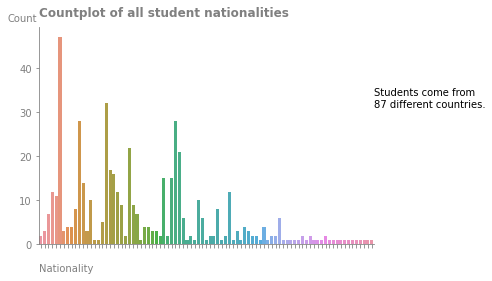

In [93]:
#https://seaborn.pydata.org/generated/seaborn.countplot.html
fig, ax = plt.subplots()
ax = sns.countplot(x = chinese_class_df['Nationality'])
format_plots(ax, "Countplot of all student nationalities", "Nationality", "Count")
ax.set(xticklabels=[])
fig.text(0.9, 0.6, "Students come from \n{} different countries.".format(len(chinese_class_df['Nationality'].unique())), ha='left')
ax;

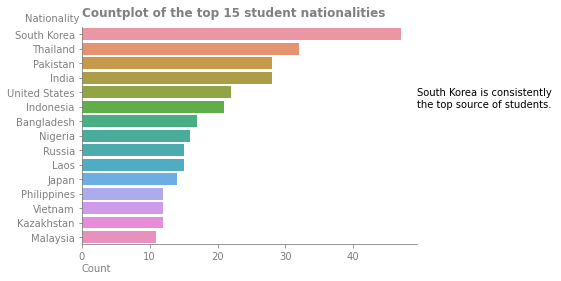

In [92]:
fig, ax = plt.subplots()
ax = sns.countplot(y="Nationality", data=chinese_class_df,
              order=chinese_class_df.Nationality.value_counts().iloc[:15].index)
format_plots(ax, "Countplot of the top 15 student nationalities", "Count", "Nationality")
fig.text(0.9, 0.6, "South Korea is consistently \nthe top source of students.", ha='left');

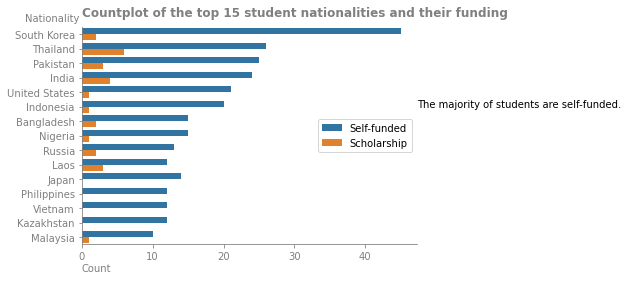

In [85]:
fig, ax = plt.subplots()
ax = sns.countplot(y="Nationality", hue="Scholarship", data=chinese_class_df,
              order=chinese_class_df.Nationality.value_counts().iloc[:15].index)
format_plots(ax, "Countplot of the top 15 student nationalities and their funding", "Count", "Nationality")
fig.text(0.9, 0.6, "The majority of students are self-funded.", ha='left')
plt.legend(['Self-funded', 'Scholarship']);

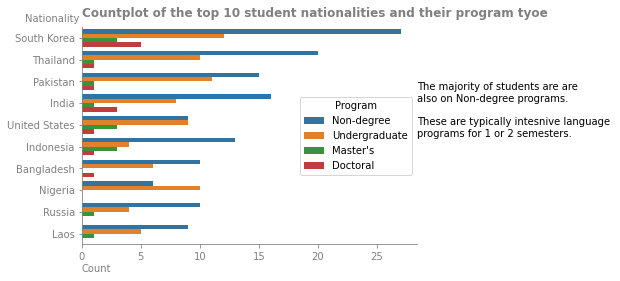

In [91]:
fig, ax = plt.subplots()
ax = sns.countplot(y="Nationality", hue="Program", data=chinese_class_df,
              order=chinese_class_df.Nationality.value_counts().iloc[:10].index)
format_plots(ax, "Countplot of the top 10 student nationalities and their program tyoe", "Count", "Nationality")
fig.text(0.9, 0.5, "The majority of students are are \nalso on Non-degree programs.\n\nThese are typically intesnive language \nprograms for 1 or 2 semesters.", ha='left');

### HSK test takers and results

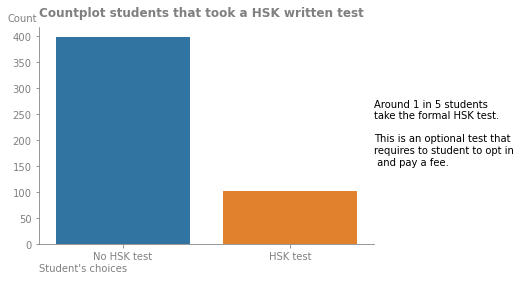

In [102]:
fig, ax = plt.subplots()
ax = sns.countplot(x = chinese_class_df['HSK written test?'])
format_plots(ax, "Countplot students that took a HSK written test", "Student's choices", "Count")
ax.set(xticklabels=['No HSK test', 'HSK test'])
fig.text(0.9, 0.4, "Around 1 in 5 students \ntake the formal HSK test. \n\nThis is an optional test that \nrequires to student to opt in\n and pay a fee.".format(len(chinese_class_df['Nationality'].unique())), ha='left')
ax;

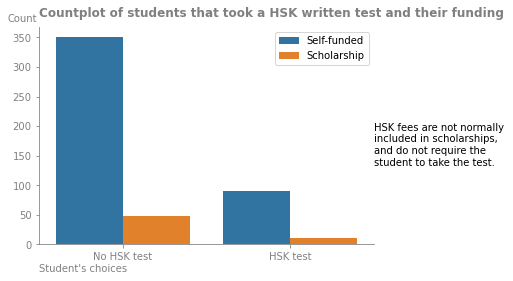

In [107]:
fig, ax = plt.subplots()
ax = sns.countplot(x = chinese_class_df['HSK written test?'], hue = chinese_class_df['Scholarship'])
format_plots(ax, "Countplot of students that took a HSK written test and their funding", "Student's choices", "Count")
ax.set(xticklabels=['No HSK test', 'HSK test'])
fig.text(0.9, 0.4, "HSK fees are not normally \nincluded in scholarships, \nand do not require the \nstudent to take the test.".format(len(chinese_class_df['Nationality'].unique())), ha='left')
plt.legend(['Self-funded', 'Scholarship']);
ax;

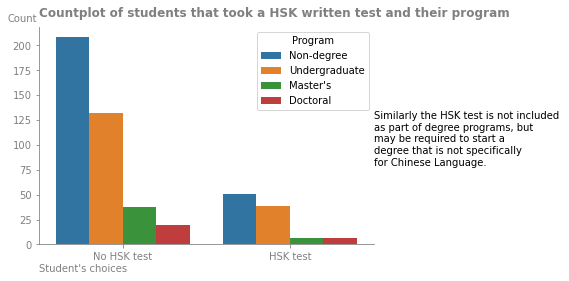

In [111]:
fig, ax = plt.subplots()
ax = sns.countplot(x = chinese_class_df['HSK written test?'], hue = chinese_class_df['Program'])
format_plots(ax, "Countplot of students that took a HSK written test and their program", "Student's choices", "Count")
ax.set(xticklabels=['No HSK test', 'HSK test'])
fig.text(0.9, 0.4, "Similarly the HSK test is not included \nas part of degree programs, but \nmay be required to start a \ndegree that is not specifically \nfor Chinese Language.".format(len(chinese_class_df['Nationality'].unique())), ha='left')
ax;

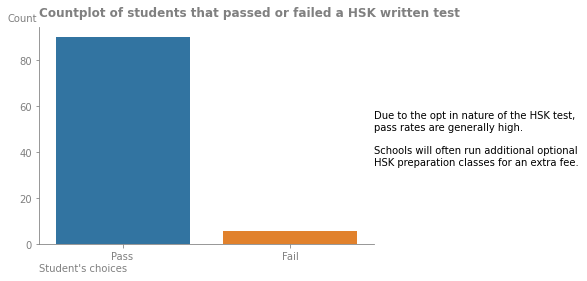

In [130]:
fig, ax = plt.subplots()
ax = sns.countplot(x = 'HSK Pass', data = chinese_class_df.loc[chinese_class_df['HSK written test?'] == 1])
format_plots(ax, "Countplot of students that passed or failed a HSK written test", "Student's choices", "Count")
ax.set(xticklabels=['Pass', 'Fail'])
fig.text(0.9, 0.4, "Due to the opt in nature of the HSK test, \npass rates are generally high. \n\nSchools will often run additional optional \nHSK preparation classes for an extra fee.".format(len(chinese_class_df['Nationality'].unique())), ha='left')
ax;

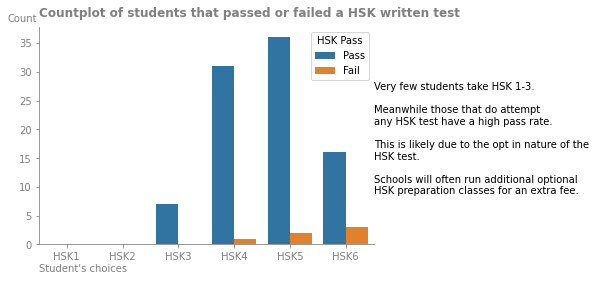

In [140]:
fig, ax = plt.subplots()
ax = sns.countplot(x = 'HSK Level', hue = 'HSK Pass', order = ['HSK1', 'HSK2', 'HSK3', 'HSK4', 'HSK5', 'HSK6'], data = chinese_class_df.loc[chinese_class_df['HSK written test?'] == 1])
format_plots(ax, "Countplot of students that passed or failed a HSK written test", "Student's choices", "Count")
#ax.set(xticklabels=['Pass', 'Fail'])
fig.text(0.9, 0.3, "Very few students take HSK 1-3.\n\nMeanwhile those that do attempt \nany HSK test have a high pass rate.\n\nThis is likely due to the opt in nature of the \nHSK test. \n\nSchools will often run additional optional \nHSK preparation classes for an extra fee.".format(len(chinese_class_df['Nationality'].unique())), ha='left')
ax;

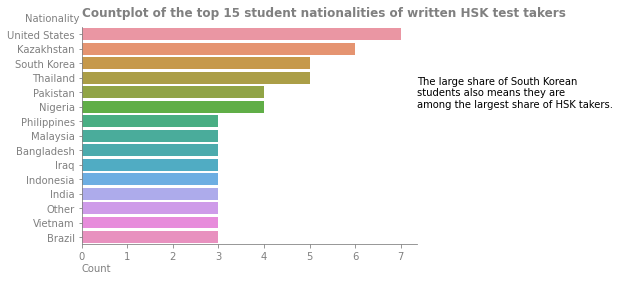

In [121]:
fig, ax = plt.subplots()
ax = sns.countplot(y="Nationality", data=chinese_class_df.loc[chinese_class_df['HSK written test?'] == 1],
              order=chinese_class_df.loc[chinese_class_df['HSK written test?'] == 1].Nationality.value_counts().iloc[:15].index)
format_plots(ax, "Countplot of the top 15 student nationalities of written HSK test takers", "Count", "Nationality")
fig.text(0.9, 0.6, "The large share of South Korean \nstudents also means they are \namong the largest share of HSK takers.", ha='left');

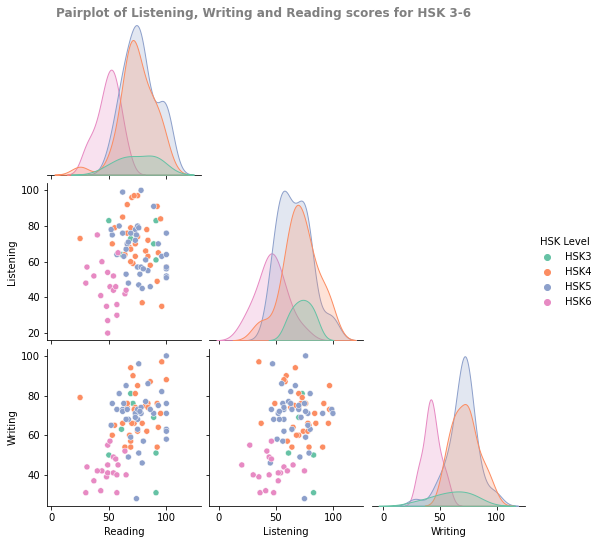

In [64]:
hsk_written_sections = chinese_class_df.loc[chinese_class_df['HSK Level'].isin(hsk_writing_sections),'HSK Level':'Writing'].sort_values('HSK Level')
ax = sns.pairplot(hsk_written_sections, dropna=True, hue = 'HSK Level', palette = 'Set2', corner=True)
ax.fig.suptitle("Pairplot of Listening, Writing and Reading scores for HSK 3-6", x=0.1, y = 1, fontsize = 12, ha='left', color = '#808080', fontweight = 'bold');

/Users/Brian/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Brian/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


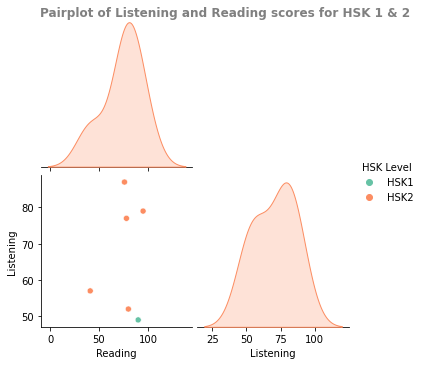

In [65]:
hsk_written_sections = chinese_class_df.loc[~chinese_class_df['HSK Level'].isin(hsk_writing_sections),'HSK Level':'Listening'].sort_values('HSK Level')
ax = sns.pairplot(hsk_written_sections, dropna=True, hue = 'HSK Level', palette = 'Set2', corner=True)
ax.fig.suptitle("Pairplot of Listening and Reading scores for HSK 1 & 2", x=0.1, y = 1, fontsize = 12, ha='left', color = '#808080', fontweight = 'bold');

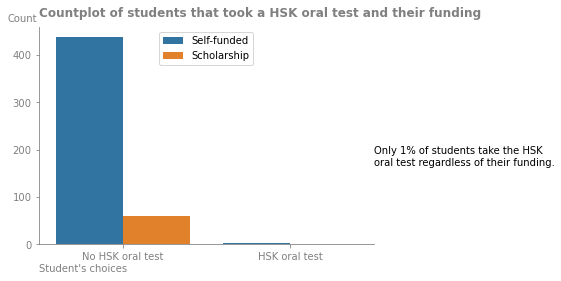

In [114]:
fig, ax = plt.subplots()
ax = sns.countplot(x = chinese_class_df['HSK oral test?'], hue = chinese_class_df['Scholarship'])
format_plots(ax, "Countplot of students that took a HSK oral test and their funding", "Student's choices", "Count")
ax.set(xticklabels=['No HSK oral test', 'HSK oral test'])
fig.text(0.9, 0.4, "Only 1% of students take the HSK \noral test regardless of their funding.".format(len(chinese_class_df['Nationality'].unique())), ha='left')
plt.legend(['Self-funded', 'Scholarship']);
ax;

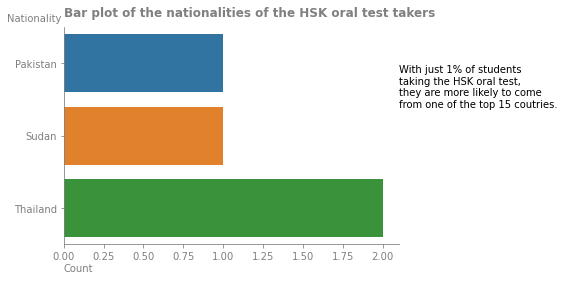

In [36]:
fig, ax = plt.subplots()
ax = sns.barplot(x = chinese_class_df.loc[chinese_class_df['HSK oral test?'] == 1].groupby('Nationality').count().reset_index()['Scholarship'], y = chinese_class_df.loc[chinese_class_df['HSK oral test?'] == 1].groupby('Nationality').count().reset_index()['Nationality'], orient="h")
format_plots(ax, "Bar plot of the nationalities of the HSK oral test takers", "Count", "Nationality")
fig.text(0.9, 0.6, "With just 1% of students \ntaking the HSK oral test, \nthey are more likely to come \nfrom one of the top 15 coutries.", ha='left')
ax;

## Next steps

* Alter HSK 6 distributions based on http://www.chinesetest.cn/gonewcontent.do?id=8750514 
* Tidy up code.
* Write up in more detail what each piece means and its implications.
* Sort out references throughout.
* Write README.
* Include a tidy version of the entire code at the top of the notebook.
* Visualize the data points.

## Resources

https://ejournals.bc.edu/index.php/ihe/article/download/10945/9333/

Includes some statistics on education background and funding.

http://en.moe.gov.cn/documents/reports/201904/t20190418_378692.html

More information on funding, origin country, where they studied, education background.

https://www.researchgate.net/figure/Descriptive-statistics-of-general-proficiency-measured-by-HSK_tbl1_312107625
https://www.researchgate.net/figure/Correlations-among-proficiency-subskills-and-total-scores-of-pre-HSK-and-post-HSK-data_tbl4_325299887

109 US students measured on their Chinese proficiency upon returning to the US after 1 year in Beijing.

https://www.kaggle.com/kerneler/starter-china-scholarship-data-may-8638c810-6

Data on scholarships provided by Chinese universities.

http://blog.sina.com.cn/s/blog_53e7c11d0101f02j.html

Number of people that took HSK from 2009-2012

http://global.chinadaily.com.cn/a/201905/31/WS5cf0b106a3104842260bee25.html
6.8 million tests taken in 2018


https://forum.duolingo.com/comment/30363109/Percentage-of-users-who-complete-their-tree-for-each-language
Duolingo stats from 2019 suggesting 0.0124% complete the content. This covers 1000 characters, so not even HSK 4 level.

https://www.statista.com/statistics/430717/china-foreign-students-by-country-of-origin/
Foreign students by country of origin 2018.

https://www.echinacities.com/china-news/Is-the-HSK-Level-6-Test-Too-Difficult-Foreign-Test-Takers-Seem-to-Think-So
Why people don't go above level 4/5.

https://educationdata.org/international-student-enrollment-statistics
statistics on US students abroad

https://stackoverflow.com/questions/49471442/using-pandas-value-counts-to-get-one-value

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#n

https://stackoverflow.com/questions/31247763/round-columns-in-pandas-dataframe

https://realpython.com/python-string-formatting/

shows distributions of scores - compare to US students 
http://www.chinesetest.cn/gonewcontent.do?id=8750514 